# Avocado Project

Project Description:
    
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
    
•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label:

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip


*Statement Problem:

To predict the region and the Average Price (of avocados) based on different parameters like 'Date, Type, Year, Region, Total Volume etc*.

In [1]:
### importing libraries to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
!pip install scipy
from sklearn.preprocessing import OrdinalEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings ("ignore")

import warnings
warnings.filterwarnings ("ignore")

In [2]:
#load the dataset
link="https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Avocado/avocado.csv.zip"


df_avocado=pd.read_csv(link)

In [3]:
df_avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
#Columns present in the dataset 
df_avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
#shape of the Data
df_avocado.shape

(18249, 14)

Observation:

This dataset contain the information of Hass avocados downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV, the data shows the actual retail sales of Hass avocados  since 2013. The datas are numerical, categorical and continous datas. There are 18249 samples in the dataset with 14 columns of which 2 of it are to be considered as the target variables ('region and the Average Price').

In [6]:
# Checking the column information
df_avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Observation:

The columns have 3 different data types made up of 9 float Dtypes, 3 object dtypes and 2 integers Dtypes. 

No missing information.

In [7]:
# Check for missing values
print(df_avocado.isnull().sum())

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


There are no Null values in the dataset

In [8]:
# Check for duplicates
df_avocado.duplicated().sum()

0

There are no duplicate values in the dataset

In [9]:
#Unique values in each of the colums

df_avocado.nunique().to_frame("Unique Values")

,Unique Values
Unnamed: 0,53
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082


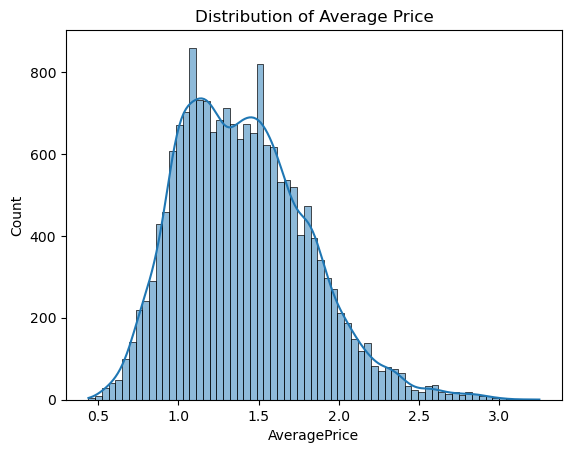

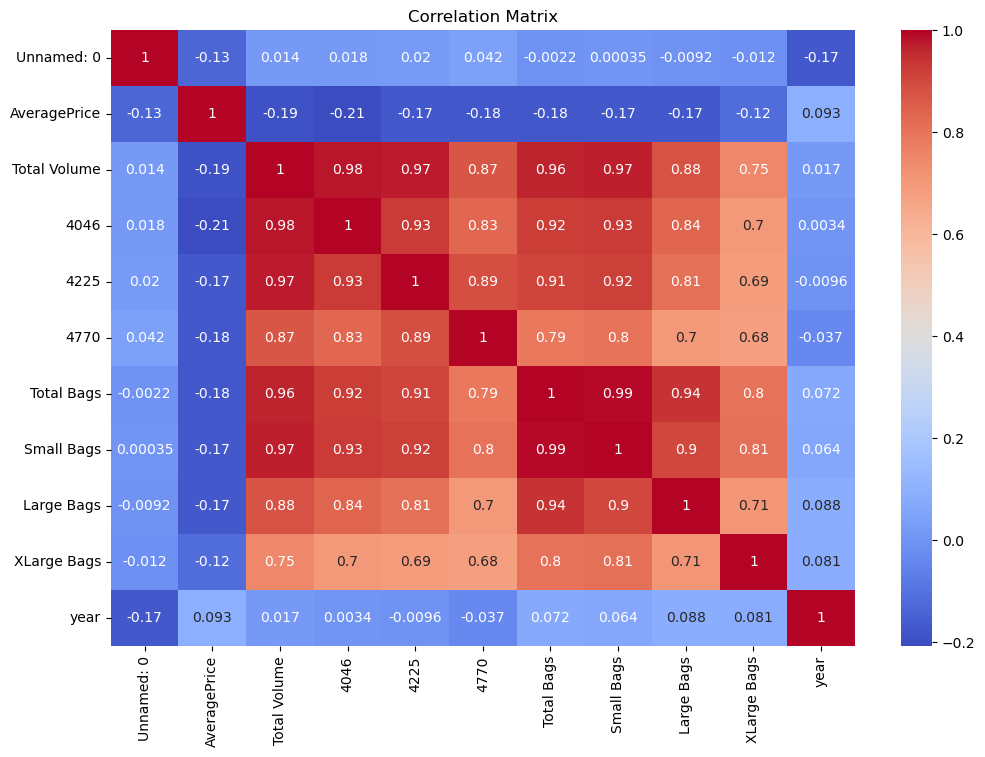

In [10]:
# Plot the distribution of the target variable (W - Wins)
sns.histplot(df_avocado['AveragePrice'], kde=True)
plt.title('Distribution of Average Price')
plt.show()

# Correlation matrix
corr = df_avocado.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
cor_avo =df_avocado.corr()
cor_avo

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


Average price shows a negative correlation with the volume of the avocadoes sold in the various form.

In [12]:
#Data Skewness
df_avocado.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

conventional    9126
organic         9123
Name: type, dtype: int64


<Axes: xlabel='type', ylabel='count'>

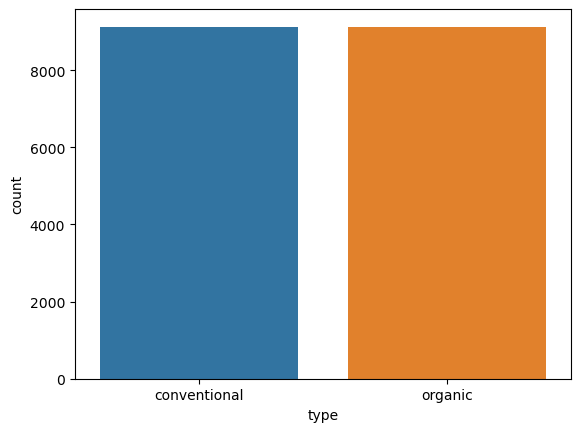

In [13]:
#Counts by Type of Avocadoes
print(df_avocado['type'].value_counts())
sns.countplot(x ='type', data=df_avocado)

The type of Avocadoes consumed by people doesn't really varies, both the conventional and organic were consumed in same quantity.

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

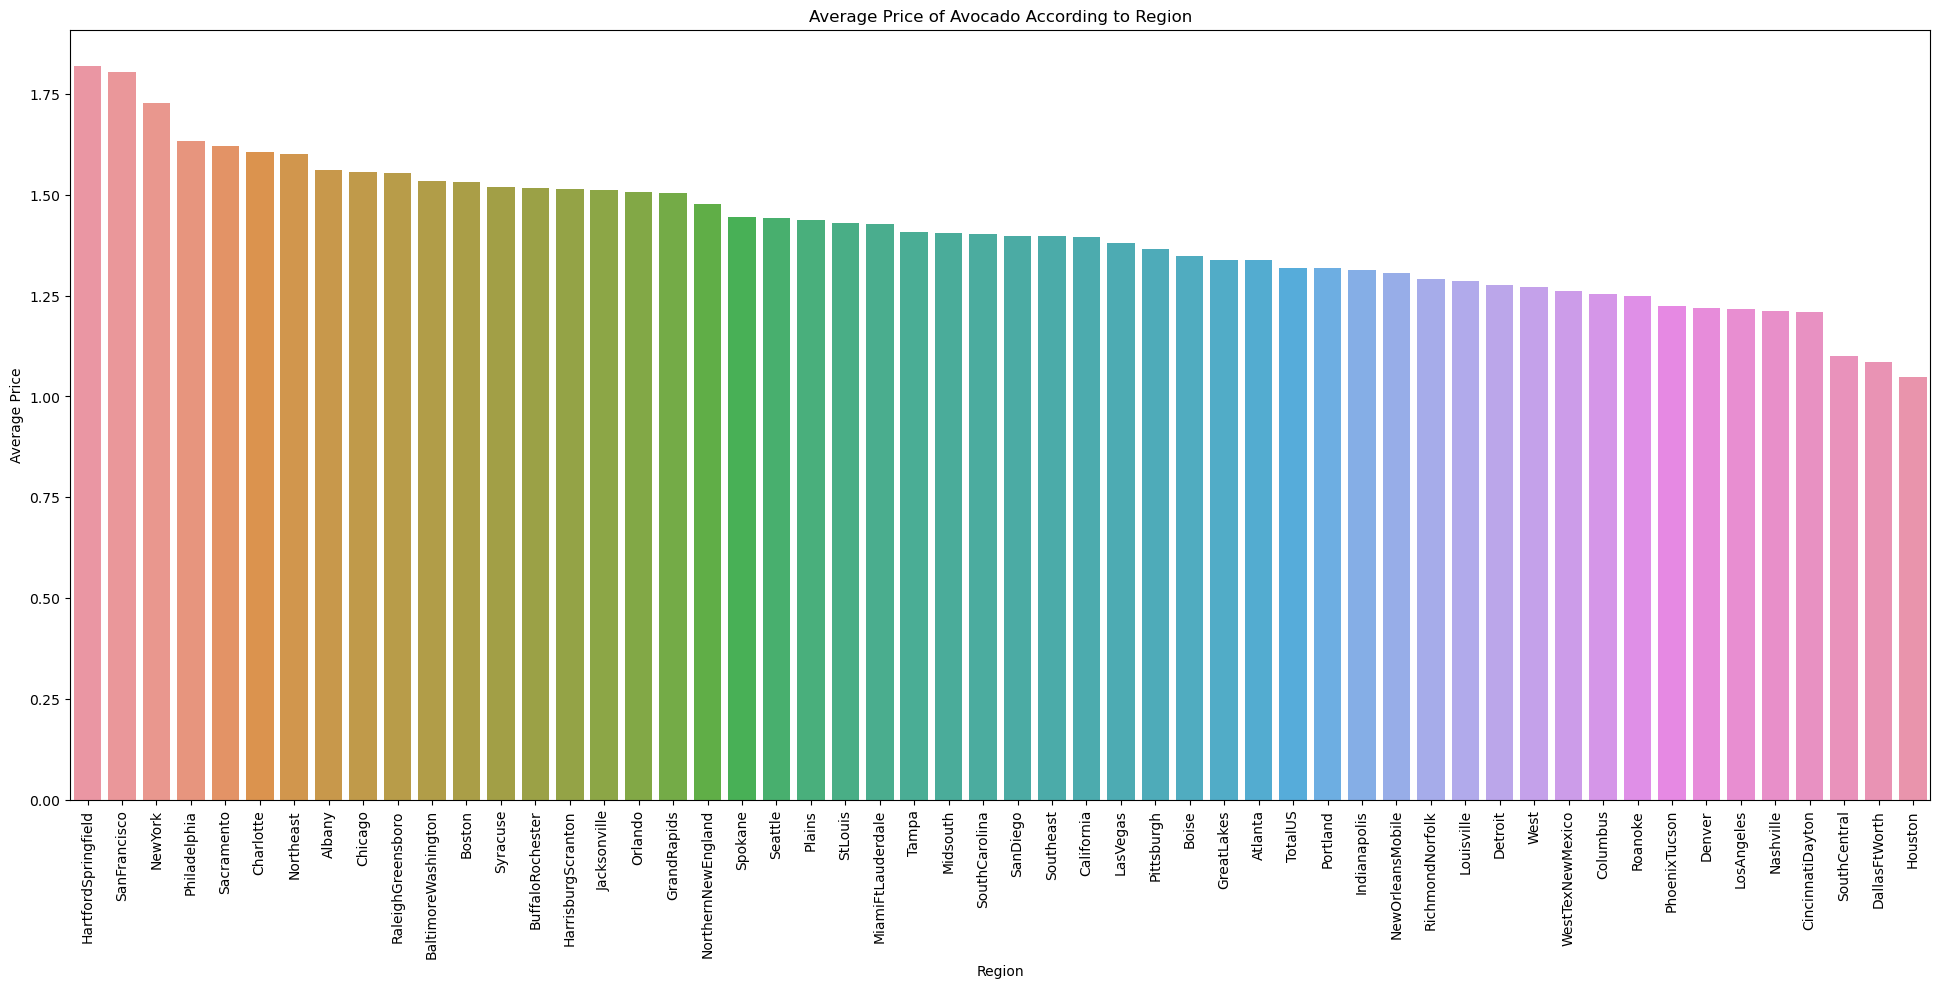

In [14]:
##Plot average price against region
region_list=list(df_avocado.region.unique())
average_price=[]

for i in region_list:
    x=df_avocado[df_avocado.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

The above shows average price across the region: 

Text(0.5, 1.0, 'Average of Total Volume According to Region')

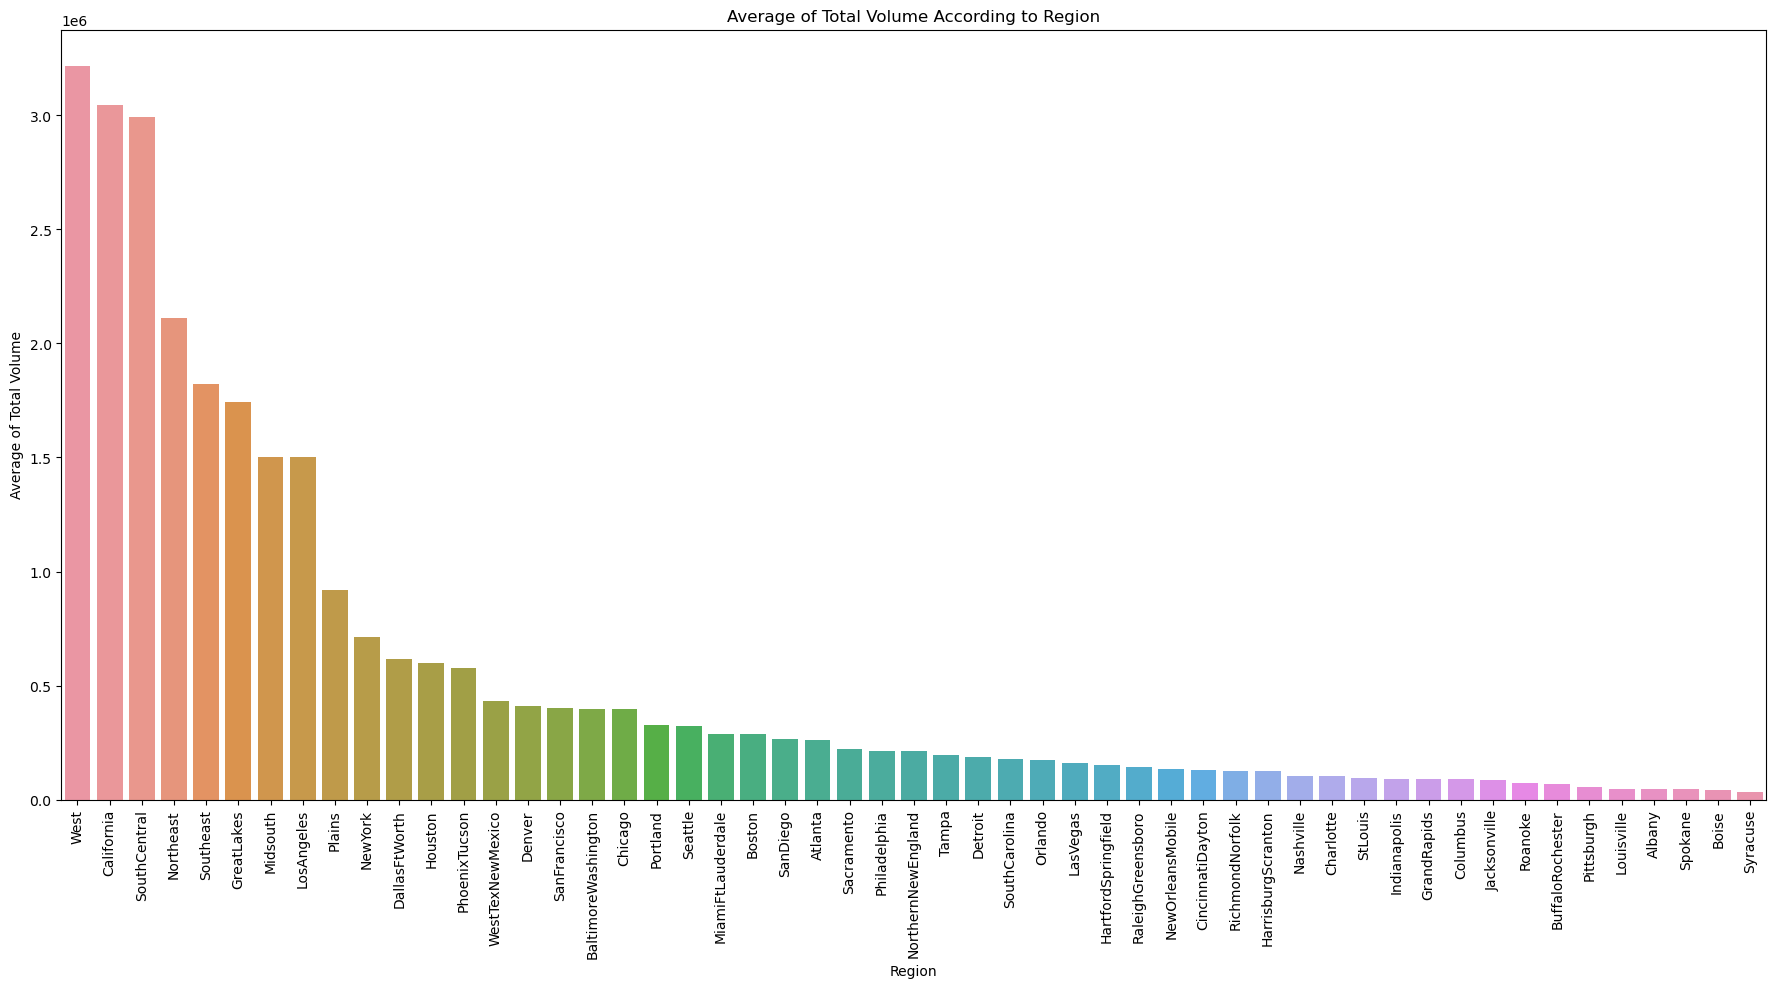

In [15]:
##Plot Total Volume against region
filter1=df_avocado.region!='TotalUS'
df1=df_avocado[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

The diagrame shows the average total volume of Avocadoes consumed in the regions

In [16]:
# Convert the date column to datetime format
df_avocado['Date'] = pd.to_datetime(df_avocado['Date'])

# Extract year and month from the Date colum
df_avocado['year'] = df_avocado['Date'].dt.year
df_avocado['month'] = df_avocado['Date'].dt.month


In [17]:
# Encode the 'type' column for classification
df_avocado['type'] = df_avocado['type'].map({'conventional': 0, 'organic': 1})



In [18]:
# Drop unnecessary columns
df_avocado.drop(['Unnamed: 0', 'Date'], axis=1, inplace=True)



In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
region= LabelEncoder()

In [21]:
df_avocado['region'] =region.fit_transform(df_avocado['region'])

In [22]:
# Renaming columns name
df_avocado.rename(columns={'4046':'Plu_4046',
           '4225':'Plu_4225',
           '4770':'Plu_4770'},inplace=True)

In [23]:
# Display the processed dataframe
df_avocado.head()

,AveragePrice,Total Volume,Plu_4046,Plu_4225,Plu_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11


# 1. Classification model

In [24]:
# Defining input features and target variable for Classification
x = df_avocado.drop(['region', 'AveragePrice'], axis=1)
y= df_avocado['region']

In [25]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

In [26]:
# Feature scaling using standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Total Volume,Plu_4046,Plu_4225,Plu_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282,1.647632
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282,1.647632
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282,1.647632
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282,1.647632
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282,1.364669
...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1.000164,1.970504,-1.181997
18245,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1.000164,1.970504,-1.464959
18246,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1.000164,1.970504,-1.464959
18247,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1.000164,1.970504,-1.464959


Dataset Splitting and Training:

In [27]:
# Spliting the data into Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Training and Evaluation:

1. Stochastic Gradient Descent (SGD):

In [28]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)

sgd.score(x_train, y_train)

acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)

acc_sgd

16.57

2. Random Forest:

In [29]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_pred = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

100.0

 3. Logistic Regression:

In [30]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

34.2

4. K Nearest Neighbor:

In [31]:
knn =KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train) 
Y_pred = knn.predict(x_test) 
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

83.02

5. Gaussian Naive Bayes:

In [32]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)
Y_pred =gaussian.predict(x_test) 
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

30.67

6. Perceptron: 

In [33]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(x_train, y_train)

Y_pred = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

13.07

7. Linear Support Vector Machine:

In [34]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

30.6

8. Decision Tree:

In [35]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
Y_pred = decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

100.0

Which is the best Model?

In [36]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
83.02,KNN
34.20,Logistic Regression
30.67,Naive Bayes
30.60,Support Vector Machines
16.57,Stochastic Gradient Decent
13.07,Perceptron


As we can see, Random Forest has the best Score ranked the 1st on the table, indicating the best model.

In [37]:
#cross validation for Random forest
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=42)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.87465753 0.89041096 0.87260274 0.87465753 0.9        0.90958904
 0.88835616 0.90616438 0.88835616 0.88211103]
Mean: 0.8886905555503393
Standard Deviation: 0.012526482359026729


In [38]:
from sklearn.model_selection import cross_val_score
rf = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77054795 0.80616438 0.7869863  0.75958904 0.79726027 0.81780822
 0.77876712 0.81027397 0.77534247 0.79643592]
Mean: 0.7899175641037678
Standard Deviation: 0.01786895353494839


The Mean Score for Random forest Classifier Model has Mean Score 89% while that of the Decision Tree is 79%.Hence the Random forest give more accurate prediction.

In [39]:
# Initialize the model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(x_train, y_train)

# Predict on the validation set
y_pred = random_forest.predict(x_test)
y_pred_proba = random_forest.predict_proba(x_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        63
           1       0.85      0.84      0.84        73
           2       0.98      0.97      0.98        61
           3       0.88      0.88      0.88        72
           4       0.89      0.93      0.91        67
           5       0.92      0.81      0.86        73
           6       0.97      0.98      0.98        62
           7       0.94      0.87      0.90        76
           8       0.97      0.97      0.97        72
           9       0.95      0.89      0.92        65
          10       0.87      0.82      0.84        65
          11       0.96      0.99      0.97        68
          12       0.94      0.91      0.92        65
          13       0.80      0.83      0.81        66
          14       0.89      0.94      0.92        71
          15       0.97      0.99      0.98        69
          16       0.99      0.93      0.96        71
          17       0.89    

This has an 89% accuracy prediction

In [40]:
# Map LabelEncodel back to 'Region Names'
df_avocado['region'] =region.inverse_transform(df_avocado['region'])

In [41]:
df_avocado

,AveragePrice,Total Volume,Plu_4046,Plu_4225,Plu_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico,1


# 2. Regression model

In [42]:
df_avocado['region'] =region.fit_transform(df_avocado['region'])

In [43]:
# Defining input features and target variable for Classification
x1 = df_avocado.drop(['AveragePrice'], axis=1)
y1= df_avocado['AveragePrice']

In [44]:
# Spliting the data into Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Model Training and Evaluation:

In [45]:
#Import training libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.svm import  SVR

1. Random Forest:

In [46]:
#Model Training
random_forest = RandomForestRegressor()
random_forest.fit(x_train_1, y_train_1)
pred_random_forest = random_forest.predict(x_test_1)
pred_train = random_forest.predict(x_train_1)


R2_Score_rf = r2_score(y_test_1, pred_random_forest)*100
R2_Score_training_rf = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_rf = mean_absolute_error(y_test_1, pred_random_forest)
Mean_Squared_error_rf = mean_squared_error(y_test_1, pred_random_forest)
Root_Mean_Squared_error_rf= np.sqrt(mean_squared_error(y_test_1, pred_random_forest))

print(random_forest)
print("R2_Score_rf: ", R2_Score_rf)
print("R2_Score on training Data: ", R2_Score_training_rf)
print("Mean Absolute error: ", Mean_Absolute_error_rf)
print("Mean Squared error: ", Mean_Squared_error_rf)
print("Root Mean Squared error: ", Root_Mean_Squared_error_rf)


RandomForestRegressor()
R2_Score_rf:  89.20614355458302
R2_Score on training Data:  98.4962940275938
Mean Absolute error:  0.0917167397260274
Mean Squared error:  0.01734239020547945
Root Mean Squared error:  0.13169050917009717


2. K Nearest Neighbor:

In [47]:
knn =KNeighborsRegressor(n_neighbors = 3)
knn.fit(x_train_1, y_train_1)
pred_knn = knn.predict(x_test_1)
pred_train = knn.predict(x_train_1)


R2_Score_kn = r2_score(y_test_1, pred_knn)*100
R2_Score_training_kn = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_kn = mean_absolute_error(y_test_1, pred_knn)
Mean_Squared_error_kn = mean_squared_error(y_test_1, pred_knn)
Root_Mean_Squared_error_kn= np.sqrt(mean_squared_error(y_test_1, pred_knn))

print(knn)
print("R2_Score_kn: ", R2_Score_kn)
print("R2_Score on training Data: ", R2_Score_training_kn)
print("Mean Absolute error: ", Mean_Absolute_error_kn)
print("Mean Squared error: ", Mean_Squared_error_kn)
print("Root Mean Squared error: ", Root_Mean_Squared_error_kn)

KNeighborsRegressor(n_neighbors=3)
R2_Score_kn:  60.84857957014671
R2_Score on training Data:  83.18215104188312
Mean Absolute error:  0.17390776255707763
Mean Squared error:  0.06290422831050228
Root Mean Squared error:  0.25080715362704925


3. Decision Tree:

In [48]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train_1, y_train_1)
pred_decision_tree = decision_tree.predict(x_test_1)
pred_train = decision_tree.predict(x_train_1)

R2_Score_dt = r2_score(y_test_1, pred_decision_tree)*100
R2_Score_training_dt = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_dt = mean_absolute_error(y_test_1, pred_decision_tree)
Mean_Squared_error_dt = mean_squared_error(y_test_1, pred_decision_tree)
Root_Mean_Squared_error_dt =  np.sqrt(mean_squared_error(y_test_1, pred_decision_tree))

print(decision_tree)
print("R2_Score_dt: ", R2_Score_dt)
print("R2_Score on training Data: ", R2_Score_training_dt)
print("Mean Absolute error: ", Mean_Absolute_error_dt)
print("Mean Squared error: ", Mean_Squared_error_dt)
print("Root Mean Squared error: ", Root_Mean_Squared_error_dt)

DecisionTreeRegressor()
R2_Score_dt:  78.74054599821588
R2_Score on training Data:  100.0
Mean Absolute error:  0.11944109589041095
Mean Squared error:  0.034157369863013695
Root Mean Squared error:  0.1848171254592325


4. Logistic Regression:

In [49]:
logreg = LinearRegression()
logreg.fit(x_train_1, y_train_1)
pred_logreg = logreg.predict(x_test_1)
pred_train = logreg.predict(x_train_1)

R2_Score_lo = r2_score(y_test_1, pred_logreg)*100
R2_Score_training_lo = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_lo = mean_absolute_error(y_test_1, pred_logreg)
Mean_Squared_error_lo = mean_squared_error(y_test_1, pred_logreg)
Root_Mean_Squared_error_lo =  np.sqrt(mean_squared_error(y_test_1, pred_logreg))

print(logreg)
print("R2_Score_lo: ", R2_Score_lo)
print("R2_Score on training Data: ",R2_Score_training_lo)
print("Mean Absolute error: ", Mean_Absolute_error_lo)
print("Mean Squared error: ", Mean_Squared_error_lo)
print("Root Mean Squared error: ", Root_Mean_Squared_error_lo)

LinearRegression()
R2_Score_lo:  43.22296162219268
R2_Score on training Data:  43.9886637479776
Mean Absolute error:  0.23309321309780862
Mean Squared error:  0.09122314709655925
Root Mean Squared error:  0.30203169882739006


5. Gradient Boosting 

In [50]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train_1, y_train_1)
pred_GBR = GBR.predict(x_test_1)
pred_train = GBR.predict(x_train_1)

R2_Score_gbr = r2_score(y_test_1, pred_GBR)*100
R2_Score_training_gbr = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_gbr = mean_absolute_error(y_test_1, pred_GBR)
Mean_Squared_error_gbr = mean_squared_error(y_test_1, pred_GBR)
Root_Mean_Squared_error_gbr =  np.sqrt(mean_squared_error(y_test_1, pred_GBR))

print(GBR)
print("R2_Score_gbr: ", R2_Score_gbr)
print("R2_Score on training Data: ", R2_Score_training_gbr)
print("Mean Absolute error: ", Mean_Absolute_error_gbr)
print("Mean Squared error: ", Mean_Squared_error_gbr)
print("Root Mean Squared error: ", Root_Mean_Squared_error_gbr)

GradientBoostingRegressor()
R2_Score_gbr:  74.20413782836455
R2_Score on training Data:  76.33817442195246
Mean Absolute error:  0.15406245360163193
Mean Squared error:  0.041445975285062865
Root Mean Squared error:  0.20358284624462558


6. Lasso

In [51]:
lass = Lasso()
lass.fit(x_train_1, y_train_1)
pred_lass = lass.predict(x_test_1)
pred_train = lass.predict(x_train_1)

R2_Score_las = r2_score(y_test, pred_lass)*100
R2_Score_training_las = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_las = mean_absolute_error(y_test_1, pred_lass)
Mean_Squared_error_las =  mean_squared_error(y_test_1, pred_lass)
Root_Mean_Squared_error_las = np.sqrt(mean_squared_error(y_test_1, pred_lass))

print(lass)
print("R2_Score_las: ", R2_Score_las)
print("R2_Score on training Data: ", R2_Score_training_las)
print("Mean Absolute error: ", Mean_Absolute_error_las)
print("Mean Squared error: ", Mean_Squared_error_las)
print("Root Mean Squared error: ", Root_Mean_Squared_error_las)

Lasso()
R2_Score_las:  -258.634080848174
R2_Score on training Data:  5.294794625253729
Mean Absolute error:  0.314790210742163
Mean Squared error:  0.15373814695275523
Root Mean Squared error:  0.392094563788833


7. Ridge

In [52]:
rid = Ridge()
rid .fit(x_train_1, y_train_1)
pred_rid  = rid .predict(x_test_1)
pred_train = rid .predict(x_train_1)

R2_Score_rid = r2_score(y_test_1, pred_rid)*100
R2_Score_training_rid = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_rid = mean_absolute_error(y_test_1, pred_rid)
Mean_Squared_error_rid =  mean_squared_error(y_test_1, pred_rid)
Root_Mean_Squared_error_rid = np.sqrt(mean_squared_error(y_test_1, pred_rid))

print(rid )
print("R2_Score_rid: ", R2_Score_rid)
print("R2_Score on training Data: ", R2_Score_training_rid)
print("Mean Absolute error: ", Mean_Absolute_error_rid)
print("Mean Squared error: ", Mean_Squared_error_rid)
print("Root Mean Squared error: ", Root_Mean_Squared_error_rid)

Ridge()
R2_Score_rid:  43.22329073797023
R2_Score on training Data:  43.9886601233263
Mean Absolute error:  0.23309246327515903
Mean Squared error:  0.0912226183092564
Root Mean Squared error:  0.30203082344233745


8. SVR

In [53]:
svr = SVR()
svr.fit(x_train_1, y_train_1)
pred_svr = svr.predict(x_test_1)
pred_train = svr.predict(x_train_1)

R2_Score_svr = r2_score(y_test_1, pred_svr)*100
R2_Score_training_svr = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_svr = mean_absolute_error(y_test_1, pred_svr)
Mean_Squared_error_svr =  mean_squared_error(y_test_1, pred_svr)
Root_Mean_Squared_error_svr = np.sqrt(mean_squared_error(y_test_1, pred_svr))

print(svr)
print("R2_Score_svr: ", R2_Score_svr)
print("R2_Score on training Data: ", R2_Score_training_svr)
print("Mean Absolute error: ", Mean_Absolute_error_svr)
print("Mean Squared error: ", Mean_Squared_error_svr)
print("Root Mean Squared error: ", Root_Mean_Squared_error_svr)

SVR()
R2_Score_svr:  33.39325013892842
R2_Score on training Data:  36.092892803831745
Mean Absolute error:  0.24994853174959317
Mean Squared error:  0.10701645442949419
Root Mean Squared error:  0.32713369503842643


In [54]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'KNN', 'Decision Tree', 
              'Linear Regression', 'Gradient Boosting', 'Lasso', 
              'Ridge', 'SVR'],
    'Score': [R2_Score_rf, R2_Score_kn, R2_Score_dt, 
              R2_Score_lo, R2_Score_gbr, R2_Score_las, 
             R2_Score_rid, R2_Score_svr]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
89.206144,Random Forest
78.740546,Decision Tree
74.204138,Gradient Boosting
60.848580,KNN
43.223291,Ridge
43.222962,Linear Regression
33.393250,SVR
-258.634081,Lasso


As we can see, Random Forest is ranked the first on the table with the highest R2 Score. Checking how Random Forest performs.

In [55]:
random_forest = RandomForestRegressor()
random_forest.fit(x_train_1, y_train_1)
pred_random_forest = random_forest.predict(x_test_1)
pred_train = random_forest.predict(x_train_1)


R2_Score_rf = r2_score(y_test_1, pred_random_forest)*100
R2_Score_training_rf = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_rf = mean_absolute_error(y_test_1, pred_random_forest)
Mean_Squared_error_rf = mean_squared_error(y_test_1, pred_random_forest)
Root_Mean_Squared_error_rf= np.sqrt(mean_squared_error(y_test_1, pred_random_forest))

print(random_forest)
print("R2_Score_rf: ", R2_Score_rf)
print("R2_Score on training Data: ", R2_Score_training_rf)
print("Mean Absolute error: ", Mean_Absolute_error_rf)
print("Mean Squared error: ", Mean_Squared_error_rf)
print("Root Mean Squared error: ", Root_Mean_Squared_error_rf)

RandomForestRegressor()
R2_Score_rf:  89.25054422192513
R2_Score on training Data:  98.47851355727644
Mean Absolute error:  0.09199994520547944
Mean Squared error:  0.01727105206027397
Root Mean Squared error:  0.13141937475225626


In [56]:
#Saving the best model
import joblib
joblib.dump(random_forest, "Avocado.pkl")

['Avocado.pkl']

In [57]:
import pickle
filename = "Avocado.pkl"
pickle.dump(random_forest, open(filename, 'wb'))

In [58]:
load_model = pickle.load(open("Avocado.pkl", 'rb'))
result = load_model.score(x_test_1, y_test_1)
print(result*100)

89.25054422192513


In [59]:
# PREDICTION OF TEST RESULT
y_pred = random_forest.predict(x_test_1)
print('Predictions:\n', y_pred)

Predictions:
 [0.9935 0.9873 1.4275 ... 0.5999 1.7082 2.2127]


In [60]:
# COMPARING TEST DATA AND PREDICTED DATA
comparison_df = pd.DataFrame({"Actual":y_test_1,"Predicted":y_pred})
print('Actual test data vs predicted: \n', comparison_df)

Actual test data vs predicted: 
        Actual  Predicted
8604     0.82     0.9935
2608     0.97     0.9873
14581    1.44     1.4275
4254     0.97     0.9090
16588    1.45     1.4414
...       ...        ...
15956    1.27     1.2280
12471    1.67     1.5914
4574     0.59     0.5999
16359    1.92     1.7082
16249    1.79     2.2127

[3650 rows x 2 columns]
